# 60 minutos sobre XGBoost

> My confession: I (over)use GBM. When in doubt, use GBM.

-- Owen Zhang, 2015;[ _"Winning Data Science Competitions"_ @ NYC Data Science Academy](https://www.youtube.com/watch?v=LgLcfZjNF44)


## Israel Zúñiga de la Mora | 01/Mar/202 @ Saturdays.ai Mty


# Objetivo de esta plática:
Aprender el uso básico de la biblioteca de Machine Lerning XGBoost para Gradient Boosting en Python.

<img src="https://ae01.alicdn.com/kf/HTB1_u80dNWYBuNjy1zkq6xGGpXaF/Mini-pollo-de-goma-grit-n-juguete-con-chirrido-juguete-divertido-con-sonido-Al-apretar-para.jpg" width="200" height="590">



# Que no veremos hoy (AKA: the proof is left as an exercise to the reader):
- Uso avanzado de XGBoost:
    - Selección de features por puntuación (XGBoost + Scikit-Learn's `SelectFromModel` class)
    - Monitoreo de performance en entrenamiento y _Early Stopping_
    - Tuning: Multithreading, Gradient Boosting Estimators, Learning Rate
    - Stochastic Gradient Boosting
    - Serialización de modelos (Pickle/Joblib)
- Uso y/o despliegue a Producción en AWS/GCP/Azure/Docker/Kubeflow/Polyaxon/MLFlow
- Comparación con otras implementaciones similares (Microsoft's LightGBM, Yandex's CatBoost, H2O's GBM)
- Formalidad en Teoría Matemática/CompSci sobre algoritmos implementados:
    - [Kaggle Winning Solution Xgboost algorithm -- Let us learn from its author](https://www.slideshare.net/ShangxuanZhang/kaggle-winning-solution-xgboost-algorithm-let-us-learn-from-its-author)
    - [Original XGBoost Paper](https://arxiv.org/pdf/1603.02754v3.pdf)
        - [Slides(Tianqi Chen)](https://homes.cs.washington.edu/~tqchen/data/pdf/BoostedTree.pdf)
    - [Documentation](https://xgboost.readthedocs.io/en/latest/)

   
# Outline

- Teoría
    - Decision Trees 
    - Gradient Boosting
    - Tree Boosting
- XGBoost
    - Qué es XGBoost?
    - Características principales
    - Por qué usar XGBoost?
- Nuestro primero modelo 🧶🐈
    - Instalación (aunque este stand-up no es un tutorial)
    - Descripción del problema
    - Carga de datos
    - Entrenamiento del modelo
    - Generación de predicciones ($\hat{Y}$)
- Visualización de árboles de decisión e imporancia de features
    - Feature Importance plot
    - Tree Graph
- Preparación de datos para GB
- (si da tiempo: Evaluación de Modelos)

# Decision Trees

- [A visual introduction to machine learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
- [The Mechanics of Machine Learning: How Machine Learning Works](https://mlbook.explained.ai/intro.html)

# Gradient Boosting

GB es una de las técnicas más populares en ML para ganar competencias de Kaggle sobre datos estructurados (y con el feature engineering adecuado), entrenar sobre datasets en los que no tenemos _business expertise_ para descubrir variables con poder predictivo o solucionar casi cualquier problema de aprendiza supervisado y ganar dinero rápido.

## Origen de _Boosting_
La idea fue articulada por Michael Kearns sobre un clasificador débil (weaker learner\*) que puede convertirse en eficiente sobre el tiempo:

> ... an efficient algorithm for converting relatively poor hypotheses into very good hypotheses — Thoughts on Hypothesis Boosting, 1988.
 

Hypothesis boosting was the idea of filtering observations, 
leaving those observations that the weak learner can handle
and focusing on developing new weak learns to handle the remaining difficult observations.

## AdaBoosting

AdaBoost y otros algoritmos relacionados son propuestos como un marco de aprendizaje estadístico por Leo Breiman como ARCing Algorithms:

> Arcing is an acronym for Adaptive Reweighting and Combining. Each step in an arcing algorithm consists of a weighted minimization followed by a recomputation of [the classifiers] and [weighted input].  — Prediction Games and Arching Algorithms, 1999

## AdaBoosting

Después, es extendido en 2001 por Jerome H. Friedman y llamado _Gradient Boosting Machine_ 


Se establece el GB como un problema de optimización donde la función objetivo es minimizar la pérdida del modelo al agregar clasificadores débiles mediante gradient descent/descenso de gradiente. Este algoritmo describe un modelo aditivo por etapas:

Un nuevo clasificador débil es agregado a la vez a una estructura de clasificadores que no se modifican.

## AdaBoosting

<img src="https://www.researchgate.net/profile/Zhuo_Wang8/publication/288699540/figure/fig9/AS:668373486686246@1536364065786/Illustration-of-AdaBoost-algorithm-for-creating-a-strong-classifier-based-on-multiple.png" width="600" height="990">
Figura: Wang, Zhuo & Zhang, Jintao & Verma, Naveen. (2015). Realizing Low-Energy Classification Systems by Implementing Matrix Multiplication Directly Within an ADC. IEEE Transactions on Biomedical Circuits and Systems. 9. 1-1. 10.1109/TBCAS.2015.2500101. 

## Entonces cómo funciona Gradient Boosting?

Se involucran tres elementos:

- Una función de pérdida a ser optimizada
- Un clasificador débil que hace prediccciones
- Un modelo aditivo que incrementa sus clasificadores para minimizar la función de pérdida

### Gradient Boosting

- **Weak learner**: es un clasificador que sin importar la distribución del dataset de entrenamiento, siempre será mejor que una elección al azar, cuando intenta etiquetar ($\hat{Y}$) los datos de una observación ($X$).


### Gradient Boosting


- Regularization: Mide la complejidad del modelo
- Training Loss: Mide que tan bien se ajusta nuestro modelo a los datos 


### Gradient Boosting

- **Training loss functions**: Métodos para la evaluación de que tan bien un algoritmo en particular está modelando las observaciones dadas. 
Si la predicción $\hat{Y}$ se desvía demasiado del resultado actual ${Y}$ la función de pérdida otorgará un valor muy alto. Gradualmente, con la ayuda de una función de optimización, la función de pérdida aprende a reducir el error en la predicción) 


### Gradient Boosting


- *Modelo Aditivo*: Es un modelo donde se añaden árboles a la vez, y los existentes no se modifican. Se usa gradient descent para minimizar la pérdida cuando se agrega un nuevo arbol. 

> One way to produce a weighted combination of classifiers which optimizes [the cost] is by gradient descent in function space. — Boosting Algorithms as Gradient Descent in Function Space, 1999. Llew Mason

Normalmente se usa el descenso de gradiente para minimizar parámetros, p. ej. el coeficiente un una ecuación de regresión o los pesos de una NN. Después de calcular el error o la pérdida, los pesos internos se actualizan para minimizar ese error.
En vez de parametros, los clasificadores débiles (decision trees). Después de calcular la pérdidad, para calcular el descenso de gradiente, debemos añadir un arbol para minimizar la pérdida (seguir el gradiente). Este approach es conocido como functional gradient descent.

## Mejoras al Gradient Boosting

Dado que GB es un algoritmo agresivo, puede sobre-entrenar en el dataset. Usando funciones de regularización que penalizen a la implementación del algoritmo:

- Constantes para árboles
- Contracción (shrinkage/learning rate)
- Random Sampling (Stochastic GB)
- Penalized Gradient Boosting (Regularized Gradient Boosting:  𝐿1 / 𝐿2 regularization of weights )

También hay dos técnicas de regularización adicionales para evitar el overfitting. El primero es la contracción (shrinkage), que agrega un factor de escala a los nuevos pesos después de cada paso de refuerzo. Esto evita que algunos árboles individuales dominen el conjunto, dejando espacio para mejorar. La segunda técnica es el submuestreo de características/features (feature subsampling), donde se muestrea una fracción de las observaciones en cada paso, para aumentar la variedad de árboles construidos. El submuestreo de características también aumenta la velocidad de cálculo, permitiendo que XGBoost se escale de manera eficiente.


\begin{equation}\label{eq:loss}
\begin{split}
\mathcal{L}(\phi) =& \sum_{i} l( \hat{y}_i, y_i ) + \sum_{k}\Omega( f_{k} ) \\
 \mbox{ donde }& \Omega(f) = \gamma T + \frac{1}{2} \lambda \|w\|^2
 \end{split}
\end{equation}


L1 regularization of weights. L2 regularization of weights.
The additional regularization term helps to smooth the final learnt weights to avoid over-fitting. Intuitively, the regularized objective will tend to select a model employing simple and predictive functions.

# Tree Boosting

## Regularized learning objective

Como en la mayoría de modelos, minimizar la pérdida (la diferencia entre la predicción $\hat{Y}$ y la etiqueta ${Y}$ ) es la meta principal y queremos que el modelo sea lo más exacto posible. También es importante agregar un término de regularización ($\Omega$) para evitar el Overfitting/sobre-entrenamiento.  Expresamos la función de objetivo de la siguiente forma

$$
\begin{equation}\label{eq:loss}
\begin{split}
\mathcal{L}(\phi) =& \sum_{i} l( \hat{y}_i, y_i ) + \sum_{k}\Omega( f_{k} ) \\
 \end{split}
\end{equation}
$$





Here $l$ is a differentiable convex loss function that measures the difference between the prediction $\hat{y}_i$ and the target $y_i$. The second term $\Omega$ penalizes the complexity of the model (i.e., the regression tree functions).
The additional regularization term helps to smooth the final learnt weights to avoid over-fitting.
Intuitively, the regularized objective will tend to select a model employing simple and predictive functions.
A similar regularization technique has been used in Regularized greedy forest~(RGF)~ model.
Our objective and the corresponding learning algorithm is simpler than RGF and easier to parallelize.
When the regularization parameter is set to zero, the objective falls back to the traditional gradient tree boosting.


También hay dos técnicas de regularización adicionales para evitar el sobreajuste. El primero es la contracción (shrinkage), que agrega un factor de escala a los nuevos pesos después de cada paso de refuerzo. Esto evita que algunos árboles individuales dominen el conjunto, dejando espacio para mejorar. La segunda técnica es el submuestreo de características/features (feature subsampling), donde se muestrea una fracción de las observaciones en cada paso, para aumentar la variedad de árboles construidos. El submuestreo de características también aumenta la velocidad de cálculo, permitiendo que XGBoost se escale de manera eficiente.


\begin{equation}\label{eq:loss}
\begin{split}
\mathcal{L}(\phi) =& \sum_{i} l( \hat{y}_i, y_i ) + \sum_{k}\Omega( f_{k} ) \\
 \mbox{ donde }& \Omega(f) = \gamma T + \frac{1}{2} \lambda \|w\|^2
 \end{split}
\end{equation}


# Tree Boosting

## Gradient tree boosting

Cuando entrenamos un modelo, es común optimizarlo tomando el gradiente. Sin embargo, esto es difícil de realizar en un conjunto de árboles. En su lugar, usamos una estrategia aditiva y agregamos un árbol nuevo a la vez, de modo que cada árbol que agreguemos optimice el objetivo. Esto nos da una función de puntuación que podemos usar para evaluar la calidad de una estructura de árbol.

![](img/struct_score.png)

En pocas palabras, $g_i$ y $h_i$ se ordenan en sus hojas apropiadas, se suman y luego se puntúan.

# Tree Boosting

Ahora que tenemos un método para evaluar la calidad de la estructura de árbol, necesitamos aprender la estructura del árbol. Es imposible enumerar/completar esto en un solo paso para todos los árboles posibles, por lo que se optimiza un nivel de árbol a la vez. Comenzando con una división en una hoja, calculamos la ganancia, que viene dada por:

\begin{equation}\label{eq:gain}
      \mathcal{L}_{split} =\frac{1}{2} \left[\frac{(\sum_{i\in I_L} g_i)^2}{\sum_{i\in I_L} h_i + \lambda}+\frac{(\sum_{i\in I_R} g_i)^2}{\sum_{i\in I_R} h_i + \lambda} - \frac{(\sum_{i\in I} g_i)^2}{\sum_{i\in I} h_i + \lambda}\right] - \gamma
\end{equation}


---
Donde $I_j=\{i|q(x_i)=j\}$ es el conjunto de instancias de la hoja  $j$

# XGBoost: eXtreme Gradient Boosting

XGBoost es una implementación **Open Source** de Gradient Boosting Machines/Gradient Boosted Decision Trees creada por Tianqi Chen, en co-autoría con Carlos Guestrin, (del grupo DMLC https://dmlc.github.io/people.html, también creadores de MXNet para Deep Learning). Siendo pensada desde el origen para entrenar con velocidad de cómputo y performance.

Escrita en C++, está disponible para los SO más populares (Windows, OS X, Linux) con las siguientes interfaces:

- Command Line Inferface (CLI)
- C++
- Python
- R
- Julia
- JVM: Java (Hadoop), Scala (Spark)

## XGBoost Features

## Model Features
Soporta tres maneras (implementaciones de algoritmos) de Gradient Boosting:

- Gradient Boosting/Gradient Boosting Machine (Learning Rate)
- Stochastic Gradient Boosting (sub-sampling: row & column)
- Regularized Gradient Boosting ($L^1$, $L^2$)


## System Features
Uso de algoritmos y estructuras de datos optimizados para exprimir nuestro hardware:

- Paralelización: Uso de todos los cores durante entrenamiento (construcción de árboles)
- Cómputo Distribuido (HPC: OpenMP, Spark, Yarn, CUDA/NCCL, Dask, Dask+Kubernetes): Para entrenamiento de modelos en clusters de cómputo
- Out-of-Core Computing: Para datasets que no caben en memoria RAM


## Algorithm Features

- Manejo automático de valores faltantes (Sparsity-aware Split Finding Algorithm)
- Continued Training: Entrenamiento incremental sobre modelos previos

![](img/sparsity.png)

## Por qué usar XGBoost?


En resumen, usamos XGBoost por las siguientes razones:
- Fácil de usar e instalar
- Eficiencia
    - Rápido
    - Parelizalización sin dolor en una sola computadora o en cluster \*
- Exactitud
    - Buenos resultados para la mayoría de datasets (Pruning, Gradient Optimization)
- Personalización:
    - Paramétros
    - Cambios en la función Objetivo y evaluación
    
    
    
    
    
----
\* Sabemos lo que has llorado al implementar en tu lenguaje favorito:

- Concurrency (Threading, Async IO/Cooperative Multitasking)
- Parallelism (Multiprocessing).


### Velocidad de entrenamiento (I)


#### [Benchmarking Random Forest Implementations, Szilard Pafka. 2015](http://datascience.la/benchmarking-random-forest-implementations/)

> In our experiments, random forests with 500 trees have been trained in each tool with default hyper-parameter values. The training times and AUC as a function of the dataset size are plotted in the figures below (with more details available on Github).
------
<img src="https://raw.githubusercontent.com/szilard/benchm-ml/145e029e1d092539566ece52d528196b4117b411/2-rf/x-plot-time.png" width="700" height="1090">


> I also tried xgboost, a popular library for boosting which is capable to build random forests as well. It is fast, memory efficient and of high accuracy. Note the different shapes of the AUC and runtime vs dataset sizes for H2O and xgboost, however.

-----

<img src="https://raw.githubusercontent.com/szilard/benchm-ml/145e029e1d092539566ece52d528196b4117b411/2-rf/x-plot-auc.png" width="600" height="990">



### Velocidad de entrenamiento (II)


#### [Xgboost: A scalable tree boosting system. T Chen, C Guestrin](https://arxiv.org/abs/1603.02754)

> Figure 12: Comparison of different distributed systems on 32 EC2 nodes for 10 iterations on different subset of criteo data. XGBoost runs more 10x than spark per iteration and 2.2x as H2O’s optimized version (However, H2O is slow in loading the data, getting worse end-to-end time). Note that spark suffers from drastic slow down when running out of memory. XGBoost runs faster and scales smoothly to the full 1.7 billion examples with given resources by utilizing out-of-core computation.
------
<img src="./img/criteo-ec2-bysize-totaltime.png" width="700" height="1090">


# Nuestro primero modelo 🧶🐈
    - Instalación (aunque este stand-up no es un tutorial)
    - Descripción del problema
    - Carga de datos
    - Entrenamiento del modelo
    - Generación de predicciones


## Instalación:

### Anaconda:
`$ conda install -c conda-forge xgboost`

### PIP:
`$ pip3 install xgboost`

#### Para compilación (GCC / Mingw) y soporte de GPU (Linux): https://xgboost.readthedocs.io/en/latest/build.html

## Instalación (de complementos):

- NumPy
- SciPy
- Pandas
- Scikit-Learn
- Matplotlib
- Graphviz (`$ pip install graphviz` / `$ conda install graphviz && conda install python-graphviz`)

## Descripción del problema

### Usando Aprendizaje Supervisado (clasificación) y el dataset Digits de NIST, entrenaremos un modelo que reconozca digitos escritos a mano.

- 5620 registros por 64 atributos ( cada registro representa una imagen de 8x8 pixeles en el rango de 0 a 16
- 10 clases únicas


# The process of building a ML product
<img src="./img/process-ml.png" width="700" height="1090">


# Typical Machine Learning Workflow (I)
<img src="./img/ml-flow.png" width="700" height="1090">


# Typical Machine Learning Workflow (II)
<img src="./img/ml-flow-2.png" width="700" height="1090">


### Carga de datos (y paquetes)

In [8]:
# Numeric
import numpy as np

# DataFrame Support
import pandas as pd

#ML Algos
from xgboost import XGBClassifier

# ML toolkit

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

# Feature Viz
from xgboost import to_graphviz, plot_tree, plot_importance

# Graphing
import matplotlib.pyplot as plt
%matplotlib nbagg

In [10]:
# The digits dataset
digits = datasets.load_digits()

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [92]:
# split data into train and test sets
seed = 42
test_size = 0.33
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False, random_state=seed)

# Entrenamiento del modelo (con un solo core)

In [27]:
# Create a classifier: XGBoostClassifier!
classifier = XGBClassifier(nthread=1)

In [33]:
# We learn the digits on the 33% of the digits
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Entrenamiento del modelo (con un todos los cores disponibles)

In [93]:
# Create a classifier: XGBoostClassifier!
classifier = XGBClassifier(n_jobs=-1)

In [94]:
# We learn the digits on the 33% of the digits
%time classifier.fit(X_train, y_train)

CPU times: user 3.12 s, sys: 13.9 ms, total: 3.14 s
Wall time: 3.14 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Generación de predicciones ($\hat{Y}$)

In [95]:
# Now predict the value of the digit on the rest:
predicted = classifier.predict(X_test)

<IPython.core.display.Javascript object>


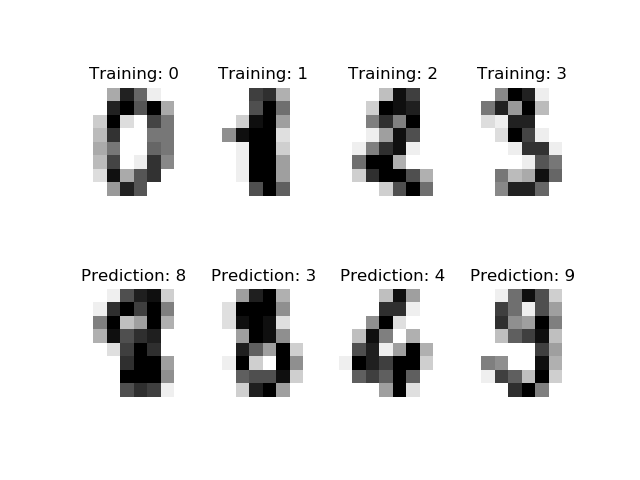

In [96]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

plt.show()

Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        88
           1       0.86      0.82      0.84        91
           2       0.96      0.90      0.93        86
           3       0.86      0.82      0.84        91
           4       0.96      0.87      0.91        92
           5       0.89      0.91      0.90        91
           6       0.93      0.95      0.94        91
           7       0.98      0.93      0.95        89
     

<IPython.core.display.Javascript object>


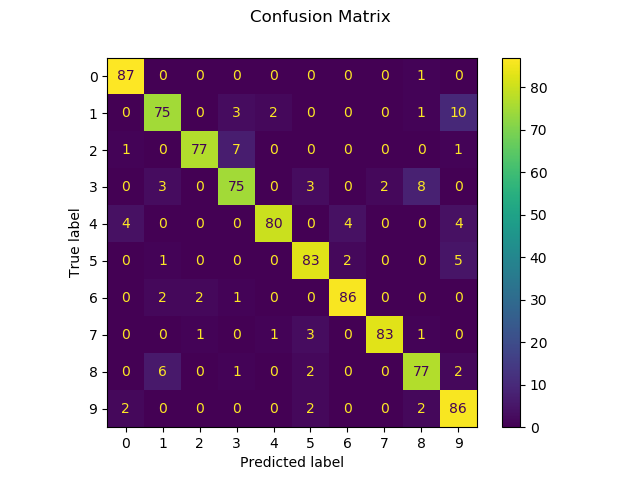

Confusion matrix:
[[87  0  0  0  0  0  0  0  1  0]
 [ 0 75  0  3  2  0  0  0  1 10]
 [ 1  0 77  7  0  0  0  0  0  1]
 [ 0  3  0 75  0  3  0  2  8  0]
 [ 4  0  0  0 80  0  4  0  0  4]
 [ 0  1  0  0  0 83  2  0  0  5]
 [ 0  2  2  1  0  0 86  0  0  0]
 [ 0  0  1  0  1  3  0 83  1  0]
 [ 0  6  0  1  0  2  0  0 77  2]
 [ 2  0  0  0  0  2  0  0  2 86]]


In [97]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

## Visualización de árboles de decisión e imporancia de features
    - Feature Importance plot
    - Tree Graph

In [41]:
# Modelo
# 284,807 registros x  31 columnas
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
# Create X and Y
X = dataset.values[:,0:29]

Y = dataset.values[:,30]

# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model with training data
model = XGBClassifier(n_jobs=-1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions

from sklearn.metrics import roc_auc_score, accuracy_score


accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.96%


In [45]:
roc_auc_score(y_test, y_pred)

0.9093480181681094

### Feature importance Plot

<IPython.core.display.Javascript object>


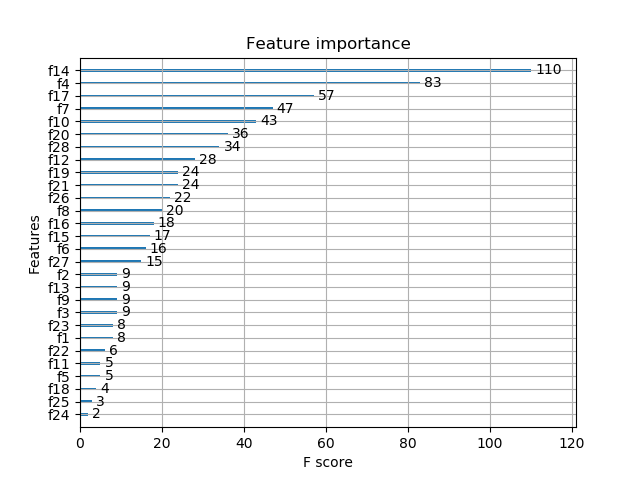

In [47]:
plot_importance(model)

In [46]:
list(enumerate(dataset.keys()))

[(0, 'Time'),
 (1, 'V1'),
 (2, 'V2'),
 (3, 'V3'),
 (4, 'V4'),
 (5, 'V5'),
 (6, 'V6'),
 (7, 'V7'),
 (8, 'V8'),
 (9, 'V9'),
 (10, 'V10'),
 (11, 'V11'),
 (12, 'V12'),
 (13, 'V13'),
 (14, 'V14'),
 (15, 'V15'),
 (16, 'V16'),
 (17, 'V17'),
 (18, 'V18'),
 (19, 'V19'),
 (20, 'V20'),
 (21, 'V21'),
 (22, 'V22'),
 (23, 'V23'),
 (24, 'V24'),
 (25, 'V25'),
 (26, 'V26'),
 (27, 'V27'),
 (28, 'V28'),
 (29, 'Amount'),
 (30, 'Class')]

### Tree Graph

<IPython.core.display.Javascript object>


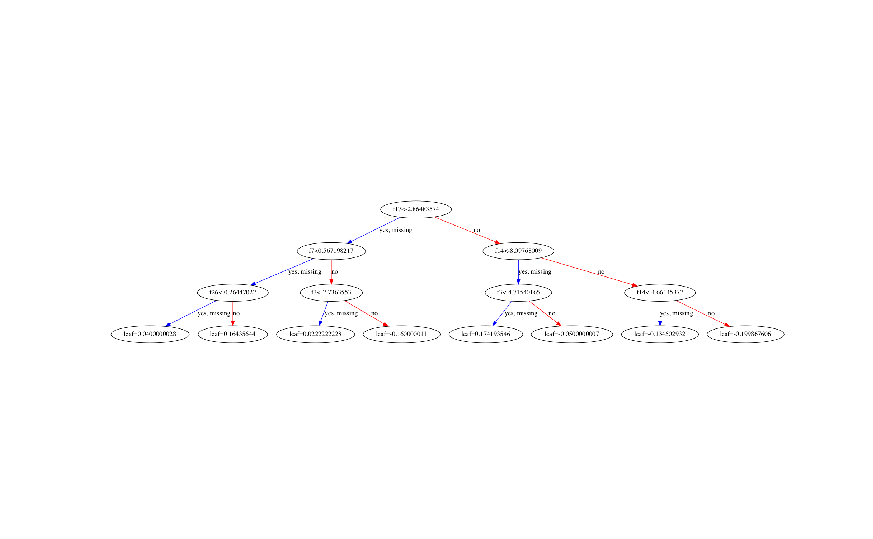

In [53]:
plot_tree(model)

# Preparación de datos para GB


XGBoost solo considera como entrada valores númericos, lo que significa que debemos "codificar" nuestro dataset  mediante:

- Label Encoding (LabelEncoder)
- OneHot Encoding (OneHotEncoder)
- Feature Scaling (StandardScaler 

In [79]:
# multiclass classification with Label Encoding
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
# load data
iris = pd.read_csv('iris.csv')
# split data into X and y
X = iris.values[:,0:4]
Y = iris.values[:,4]
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier() 
model.fit(X_train, y_train) 
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [80]:
# make predictions for test data 
predictions = model.predict(X_test) 
# evaluate predictions
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.00%


In [81]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       '

In [82]:
label_encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Evaluación de modelos

In [89]:
print("Parameter optimization")

import numpy as np

# Mean absolute percentage error
def mean_absolute_percentage_error(estimator, X, y):
    y_pred = estimator.predict(X)
    y_true = y
    return np.mean(np.abs((y_true - y_pred) / y_true))

estimators = [i for i in range(0, 5000, 500)]
gammas = [i/10 for i in range(0, 21, 1)]
max_depths=[6]


scorer = mean_absolute_percentage_error
xgb_grid_params = dict(n_estimators = estimators, gamma = gammas, max_depth=max_depths)
xgb = XGBClassifier()

xgb

Parameter optimization


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
clf = GridSearchCV(xgb,
                   xgb_grid_params, 
                   cv = 10, 
                   scoring=scorer, 
                   n_jobs = -1)


clf

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_p...
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
                                   1.8, 1.9, 2.0],


In [86]:
%time clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Parameter optimization
CPU times: user 11.2 s, sys: 676 ms, total: 11.8 s
Wall time: 9min 55s
nan
{'gamma': 0.0, 'max_depth': 6, 'n_estimators': 0}


# Fin
<img src="https://images.squarespace-cdn.com/content/v1/566a4af357eb8d3974390587/1454552043367-2FBU9V13GXPCE8XOTHXD/ke17ZwdGBToddI8pDm48kHSAkeOgqWvzfbRvJ9SrmFEUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKcmbMkAxlkrzS-mf45BwexjTt3_5zrber4q3yRYQbe7Y3Rw7Fwo0sE7sCVmv3y7HY0/ThatsAllFolks-Freleng-LtdEdCel.jpg?format=500w">